In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('./ErrorLog/errorlog0606_0612_edit_ver2.csv')
df.fillna('', inplace = True)   # 空值補 ''

print('Shape of the raw data: ', df.shape)

df.head(10)

Shape of the raw data:  (1005409, 16)


,EventTime,SessionID,UserID,ErrorEventID,Channel,Country,LV,VipLV,UDID,State,Machine,TotalBet,FeverState,PublishVer,CurChannel,IPCountry
0,1591694027,a98efd7aa8e5ca901f689caeee448a05,2.020100e+15,31419999,1,TW,999,8,"""49242BA5-2C92-43A9-A9AA-BB60517A0C2A""",,,,,,,
1,1591753912,c1c93c76a1273b6aa12751e3303e3db1,2.020100e+15,6001,1,CN,33,1,"""8FE31F29-49E0-4B64-BBBC-D9877C292968""",,,,,,,
2,1591753971,c1c93c76a1273b6aa12751e3303e3db1,2.020100e+15,9002,1,CN,33,1,"""8FE31F29-49E0-4B64-BBBC-D9877C292968""",,,,,,,
3,1591768171,"""""",2.020100e+15,2101,1,TW,1,0,"""C855F6DF-DA1A-4CCC-AC12-AA5574509E67""",,,,,,,
4,1591777553,8a6182354acf11f4bd71873be47778b4,2.020100e+15,6001,2,TW,999,8,13085a98dfaa3816,,,,,,,
5,1591711516,3d876fc03ce99a14ed5e71c0d7cb90e5,2.020100e+15,6001,2,TW,397,4,38d547b02d5d3710,,,,,,,
6,1591753763,6bc29aa385300d91541ced10f2061ad7,2.020100e+15,9002,1,TW,1000,8,"""3E1FFF13-AE55-4300-B66D-6CC18F673CF4""",,,,,,,
7,1591753737,6bc29aa385300d91541ced10f2061ad7,2.020100e+15,9002,1,TW,1000,8,"""3E1FFF13-AE55-4300-B66D-6CC18F673CF4""",,,,,,,
8,1591753711,6bc29aa385300d91541ced10f2061ad7,2.020100e+15,6001,1,TW,1000,8,"""3E1FFF13-AE55-4300-B66D-6CC18F673CF4""",,,,,,,
9,1591757540,3d116d8dacadac0094153cbab0bf7ceb,2.020100e+15,2254,1,TW,1000,8,"""3E1FFF13-AE55-4300-B66D-6CC18F673CF4""",,,,,,,


Shape of the raw data:  (169, 2)


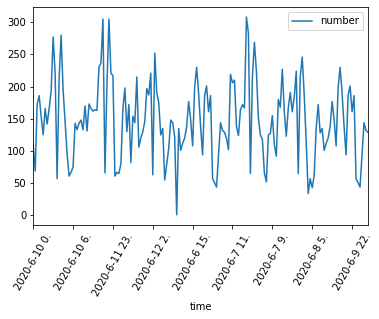

In [4]:
%matplotlib inline
from pandas.core.frame import DataFrame
from datetime import datetime

TW_EventTime = df.loc[df['IPCountry'] == "TW"]['EventTime']

date_time = []
for _time in TW_EventTime:
    dt = datetime.fromtimestamp(_time)

    # -----------------------將異常資料去除
    temp_time = str(datetime(dt.year, dt.month, dt.day))
    if temp_time == '2020-06-09 00:00:00':
        continue
    elif temp_time == '2020-06-06 00:00:00': # --------------6/9 補成 6/6
        time = f'{dt.year}-{dt.month}-9 {dt.hour}.'
        date_time.append(time)
        
    time = f'{dt.year}-{dt.month}-{dt.day} {dt.hour}.'
    date_time.append(time)
    
dic = {
    'time': date_time,
    'num': [1 for i in range(len(date_time))]
}
df_data = DataFrame(dic).groupby(by="time").count()
time = df_data.index.tolist()
number = df_data.num.tolist()

_df = pd.DataFrame()
_df['time'] = time
_df['number'] = number
_df.index = _df['time']
_df.plot(rot=60)

print('Shape of the raw data: ', _df.shape)

In [80]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import adam
from keras import optimizers

# split into train and test sets
train = np.array([_df['time'], _df['number']])

X, y = train[:, :-1], train[:, -1]
# reshape input to be 3D [samples, timesteps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))
print(X.shape, y.shape)

epochs = 40
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer=adam)
model_lstm.summary()

(2, 1, 168) (2,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 50)                43800     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 43,851
Trainable params: 43,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
print(__df.shape)
mlp_history = model_lstm.fit(X, y, epochs=epochs, batch_size=batch, validation_data=(X, y), verbose=2, shuffle=False)

(169, 1, 2)
Train on 2 samples, validate on 2 samples
Epoch 1/40


ValueError: could not convert string to float: '2020-06-05 23:00:00'

In [ ]:
# from keras.layers.wrappers import TimeDistributed

# X=np.array([[[1, 0],
#         [1, 0],
#         [1, 0],
#         [1, 0],
#         [1, 0]],

#        [[0, 1],
#         [0, 1],
#         [0, 1],
#         [0, 1],
#         [0, 1]]])


# Y=np.array([[[ 1],
#         [ 3],
#         [ 5],
#         [ 7],
#         [ 9]],

#        [[ 2],
#         [ 4],
#         [ 6],
#         [ 8],
#         [10]]])

# print(X.shape)
# print(Y.shape)
# # model = Sequential()
# # model.add(TimeDistributed(Dense(10), input_shape=(5, 2)))
# # model.add(LSTM(5, return_sequences=True))
# # model.add(LSTM(5, return_sequences=True))
# # model.add(TimeDistributed(Dense(1)))
# # model.compile(loss='mse', optimizer='adam')

# # model.fit(X,Y, nb_epoch=1000, verbose = 0)

# # model.predict(X)